# Preliminaries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)

#Parameters
t0, t, V=0, 1, 3
Nk = 201

kxs = np.linspace(-np.pi,np.pi, Nk)
kys = np.linspace(-np.pi,np.pi, Nk)
kzs = np.linspace(-np.pi,np.pi, Nk)

L = 30 #OBC in x or y-direction

# Slab spectra with OBC in y-direction

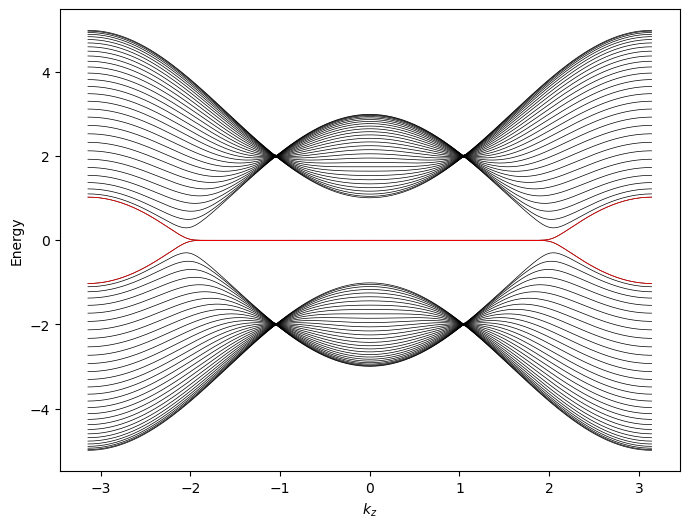

In [3]:
kx = 0 # Fixed kx value for 2D visualization of energy vs kz 

# Hamiltonian & diagonalization
eigvals_oc_vs_kz = []
for kz in kzs:
    H0 = (-2*t0*np.sin(kx))*I2 +(2*t*np.sin(kx))* sigma_x + (2*t*np.cos(kz)+2*t*(np.cos(kx))-V)* sigma_z
    V0 = -1j*t * sigma_y -t*sigma_z
    
    H_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H_open[2*i:2*i+2, 2*i:2*i+2] = H0
        if i < L - 1:
            H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V0
            H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V0.conj().T
    eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
    eigvals_oc_vs_kz.append(eigenvals_oc)

eigvals_oc_vs_kz = np.array(eigvals_oc_vs_kz).T

# Plot
plt.figure(figsize=(8,6))
for band in eigvals_oc_vs_kz:
    plt.plot(kzs, band, color='black', linewidth=0.5)

# Highlight edge states
mid = L
for b in [mid-1, mid]:
    plt.plot(kzs, eigvals_oc_vs_kz[b], color='red', linewidth =0.5)
    
plt.xlabel('$k_z$')
plt.ylabel('Energy')
plt.show()


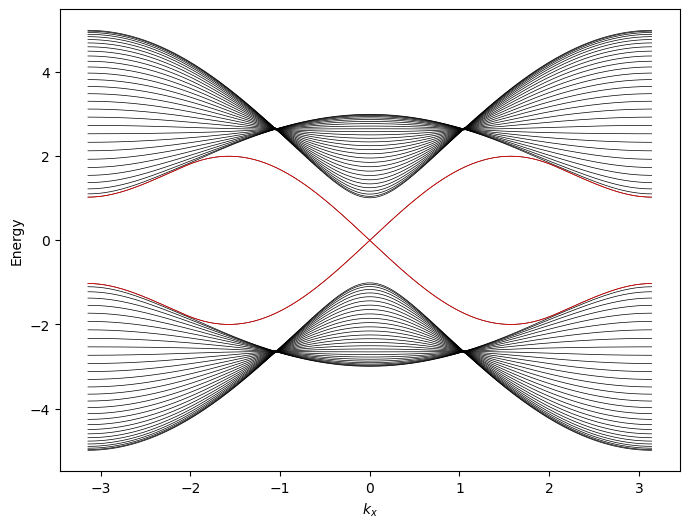

In [4]:
kz = 0 # Fixed kz value for 2D visualization of energy vs kx

eigvals_oc_vs_kx = []

# Hamiltonian & diagonalization
for kx in kxs:
    H0 = (-2*t0*np.sin(kx))*I2 +(2*t*np.sin(kx))* sigma_x + (2*t*np.cos(kz)+2*t*(np.cos(kx))-V)* sigma_z
    V0 = -1j*t * sigma_y -t*sigma_z
    
    H_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H_open[2*i:2*i+2, 2*i:2*i+2] = H0
        if i < L - 1:
            H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V0
            H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V0.conj().T
    eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
    eigvals_oc_vs_kx.append(eigenvals_oc)

eigvals_oc_vs_kx = np.array(eigvals_oc_vs_kx).T

# Plot
plt.figure(figsize=(8,6))
for band in eigvals_oc_vs_kx:
    plt.plot(kxs, band, color='black', linewidth=0.5)

# Highlight edge states
mid = L
for b in [mid-1, mid]:
    plt.plot(kxs, eigvals_oc_vs_kx[b], color='red', linewidth =0.5)
    
plt.xlabel('$k_x$')
plt.ylabel('Energy')
plt.show()


# Slab spectra with OBC in x-direction

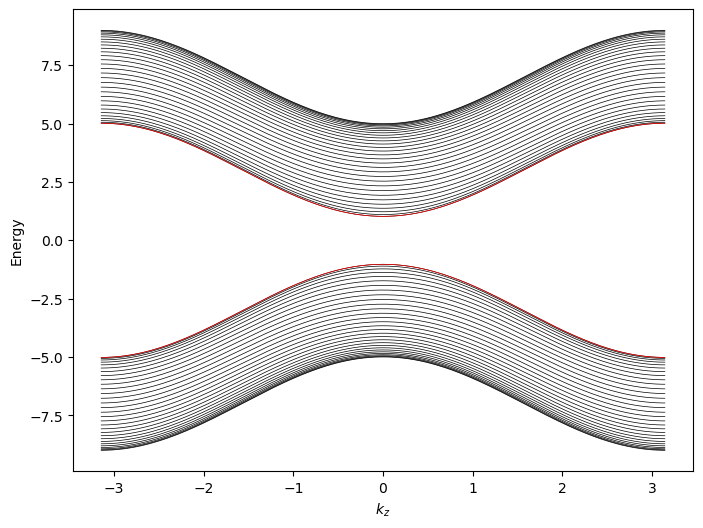

In [5]:
ky = 0 # Fixed kx value for 2D visualization of energy vs kz 

# Hamiltonian & diagonalization
eigvals_oc_vs_kz = []
for kz in kzs:
    H0 = (2*t*np.sin(ky))* sigma_y + (2*t*np.cos(kz)+2*t*(-np.cos(ky))-V)* sigma_z
    V0 = (1j*t0 *I2)+(-1j*t * sigma_x) +t*sigma_z

    H_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H_open[2*i:2*i+2, 2*i:2*i+2] = H0
        if i < L - 1:
            H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V0
            H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V0.conj().T
    eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
    eigvals_oc_vs_kz.append(eigenvals_oc)

eigvals_oc_vs_kz = np.array(eigvals_oc_vs_kz).T

# Plot
plt.figure(figsize=(8,6))
for band in eigvals_oc_vs_kz:
    plt.plot(kzs, band, color='black', linewidth=0.5)

# Highlight edge states
mid = L
for b in [mid-1, mid]:
    plt.plot(kzs, eigvals_oc_vs_kz[b], color='red', linewidth =0.5)
    
plt.xlabel('$k_z$')
plt.ylabel('Energy')
plt.show()


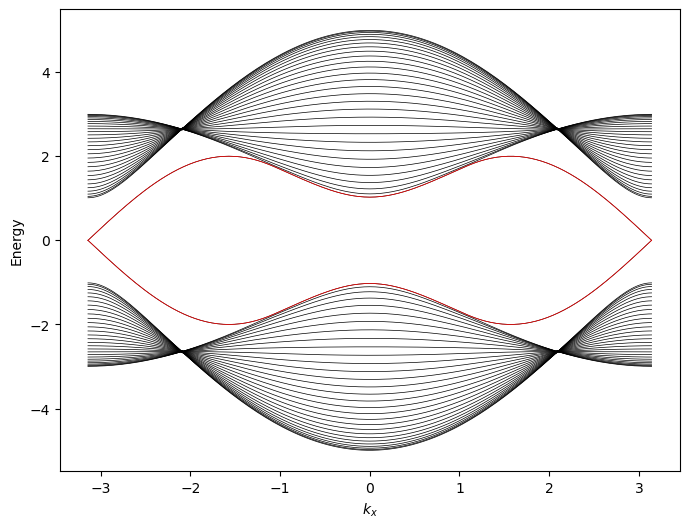

In [6]:
kz = 0 # Fixed kz value for 2D visualization of energy vs ky

eigvals_oc_vs_ky = []

# Hamiltonian
for ky in kys:
    H0 = (2*t*np.sin(ky))* sigma_y + (2*t*np.cos(kz)+2*t*(-np.cos(ky))-V)* sigma_z
    V0 = (1j*t0 *I2)+(-1j*t * sigma_x) +t*sigma_z
    
    # Diagonalization 
    H_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H_open[2*i:2*i+2, 2*i:2*i+2] = H0
        if i < L - 1:
            H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V0
            H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V0.conj().T
    eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
    eigvals_oc_vs_ky.append(eigenvals_oc)

eigvals_oc_vs_ky = np.array(eigvals_oc_vs_ky).T

# Plot
plt.figure(figsize=(8,6))
for band in eigvals_oc_vs_ky:
    plt.plot(kys, band, color='black', linewidth=0.5)

# Highlight edge states
mid = L
for b in [mid-1, mid]:
    plt.plot(kys, eigvals_oc_vs_ky[b], color='red', linewidth =0.5)
    
plt.xlabel('$k_x$')
plt.ylabel('Energy')
plt.show()